In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
# Basic Checks:

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

#### Preprocessing

In [6]:
#Checking and filling null values:

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
for i in ['Cabin','Embarked']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [10]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
#Droping irrelevant columns:

In [12]:
data.drop('Name',axis=1, inplace = True)

In [13]:
#Encoding:

In [14]:
data1 =pd.get_dummies(data)

In [15]:
#Checking distribution of target column:

In [16]:
data1['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
#splitting target column:

In [18]:
X = data1.drop('Survived',axis=1)
y = data1['Survived']

In [19]:
#Scaling:

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
stdsclr = StandardScaler()
X = stdsclr.fit_transform(X)

### KNN model_HoldOut

In [22]:
#Train-Test Split:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(X_train, y_train)
    y_pred_knn = model2.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

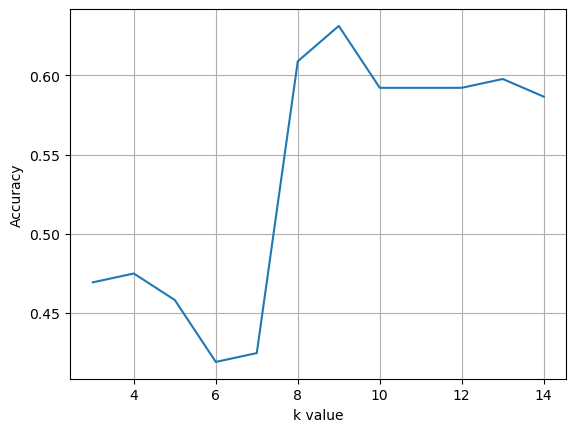

In [27]:
plt.plot(neighbors, metric_k)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)
model1 = knn.fit(X_train, y_train)
y_pred_knn = model1.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### SVM Models_HoldOut

In [29]:
from sklearn.svm import SVC

In [30]:
# rbf kernel:
svm_rbf = SVC(kernel='rbf')
svm_model1 = svm_rbf.fit(X_train,y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [31]:
#linear kernel:
svm_lnr = SVC(kernel='linear')
svm_model2 = svm_lnr.fit(X_train,y_train)
y_pred_lnr = svm_lnr.predict(X_test)

In [32]:
#polynomial kernel:
svm_poly = SVC(kernel='poly')
svm_model3 = svm_poly.fit(X_train,y_train)
y_pred_poly = svm_poly.predict(X_test)

Accuracy_Comparison_HoldOut :

In [33]:
print('KNN:',accuracy_score(y_test,y_pred_knn))
print('SVM_rbf:',accuracy_score(y_test,y_pred_rbf))
print('SVM_linear:',accuracy_score(y_test,y_pred_lnr))
print('SVM_polynomial:',accuracy_score(y_test,y_pred_poly))

KNN: 0.6312849162011173
SVM_rbf: 0.6536312849162011
SVM_linear: 0.8156424581005587
SVM_polynomial: 0.6089385474860335


### K Fold Cross Validation

In [34]:
from sklearn.model_selection import KFold

In [35]:
kfold_validator = KFold(11)

In [36]:
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:', test_index)

Training Index: [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [37]:
#CrossValidation Score:

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
k_cv_knn = cross_val_score(model1, X,y, cv=kfold_validator)
k_cv_SVM_rbf = cross_val_score(svm_model1, X,y, cv=kfold_validator)
k_cv_SVM_lnr = cross_val_score(svm_model2, X,y, cv=kfold_validator)
k_cv_SVM_poly = cross_val_score(svm_model3, X,y, cv=kfold_validator)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [40]:
print('KNN:',k_cv_knn)
print('SVM_rbf:',k_cv_SVM_rbf)
print('SVM_linear:',k_cv_SVM_lnr)
print('SVM_polynomial:',k_cv_SVM_poly)

KNN: [0.60493827 0.2962963  0.41975309 0.49382716 0.45679012 0.39506173
 0.64197531 0.62962963 0.7037037  0.32098765 0.71604938]
SVM_rbf: [0.64197531 0.7037037  0.74074074 0.66666667 0.7037037  0.67901235
 0.66666667 0.7037037  0.7037037  0.79012346 0.74074074]
SVM_linear: [0.85185185 0.82716049 0.81481481 0.77777778 0.88888889 0.81481481
 0.82716049 0.75308642 0.83950617 0.88888889 0.83950617]
SVM_polynomial: [0.59259259 0.69135802 0.7037037  0.55555556 0.60493827 0.61728395
 0.64197531 0.64197531 0.65432099 0.71604938 0.69135802]


In [41]:
#CrossValidationScore_Comparison:

In [42]:
print('KNN:',np.mean(k_cv_knn))
print('SVM_rbf:',np.mean(k_cv_SVM_rbf))
print('SVM_linear:',np.mean(k_cv_SVM_lnr))
print('SVM_polynomial:',np.mean(k_cv_SVM_poly))

KNN: 0.5162738496071828
SVM_rbf: 0.7037037037037037
SVM_linear: 0.8294051627384961
SVM_polynomial: 0.6464646464646464


### Stratified Cross Validation

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skfold_validator = StratifiedKFold(n_splits=11)

In [45]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:', test_index)

Training Index: [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [46]:
#CrossValidation Score:

In [47]:
sk_cv_knn = cross_val_score(model1, X,y, cv=skfold_validator)
sk_cv_SVM_rbf = cross_val_score(svm_model1, X,y, cv=skfold_validator)
sk_cv_SVM_lnr = cross_val_score(svm_model2, X,y, cv=skfold_validator)
sk_cv_SVM_poly = cross_val_score(svm_model3, X,y, cv=skfold_validator)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [48]:
print('KNN:',sk_cv_knn)
print('SVM_rbf:',sk_cv_SVM_rbf)
print('SVM_linear:',sk_cv_SVM_lnr)
print('SVM_polynomial:',sk_cv_SVM_poly)

KNN: [0.4691358  0.61728395 0.45679012 0.43209877 0.41975309 0.38271605
 0.65432099 0.39506173 0.58024691 0.33333333 0.69135802]
SVM_rbf: [0.66666667 0.66666667 0.74074074 0.7037037  0.74074074 0.69135802
 0.67901235 0.7037037  0.69135802 0.77777778 0.71604938]
SVM_linear: [0.85185185 0.80246914 0.82716049 0.80246914 0.90123457 0.82716049
 0.80246914 0.7654321  0.80246914 0.86419753 0.82716049]
SVM_polynomial: [0.62962963 0.60493827 0.66666667 0.62962963 0.65432099 0.61728395
 0.65432099 0.65432099 0.65432099 0.67901235 0.66666667]


In [49]:
#CrossValidationScore_Comparison:

In [50]:
print('KNN:',np.mean(sk_cv_knn))
print('SVM_rbf:',np.mean(sk_cv_SVM_rbf))
print('SVM_linear:',np.mean(sk_cv_SVM_lnr))
print('SVM_polynomial:',np.mean(sk_cv_SVM_poly))

KNN: 0.4938271604938271
SVM_rbf: 0.7070707070707071
SVM_linear: 0.8249158249158248
SVM_polynomial: 0.6464646464646465


### Accuracy Comparison Between CrossValidation and HoldOut Methods

#### KNN:

In [51]:
#HoldOut:
print('HoldOut:',accuracy_score(y_test,y_pred_knn))
#K Fold Cross Validation:
print('K Fold:',np.mean(k_cv_knn))
#Stratified Cross Validation:
print('Stratified:',np.mean(sk_cv_knn))

HoldOut: 0.6312849162011173
K Fold: 0.5162738496071828
Stratified: 0.4938271604938271


#### SVM_rbf:

In [52]:
#HoldOut:
print('HoldOut:',accuracy_score(y_test,y_pred_rbf))
#K Fold Cross Validation:
print('K Fold:',np.mean(k_cv_SVM_rbf))
#Stratified Cross Validation:
print('Stratified:',np.mean(sk_cv_SVM_rbf))

HoldOut: 0.6536312849162011
K Fold: 0.7037037037037037
Stratified: 0.7070707070707071


#### SVM_linear:

In [53]:
#HoldOut:
print('HoldOut:',accuracy_score(y_test,y_pred_lnr))
#K Fold Cross Validation:
print('K Fold:',np.mean(k_cv_SVM_lnr))
#Stratified Cross Validation:
print('Stratified:',np.mean(sk_cv_SVM_lnr))

HoldOut: 0.8156424581005587
K Fold: 0.8294051627384961
Stratified: 0.8249158249158248


#### SVM_polynomial:

In [54]:
#HoldOut:
print('HoldOut:',accuracy_score(y_test,y_pred_poly))
#K Fold Cross Validation:
print('K Fold:',np.mean(k_cv_SVM_poly))
#Stratified Cross Validation:
print('Stratified:',np.mean(sk_cv_SVM_poly))

HoldOut: 0.6089385474860335
K Fold: 0.6464646464646464
Stratified: 0.6464646464646465
